## An Example of ESC Inference Usage

In [1]:
import torch, yaml, librosa
from esc import ESC

#### Load model and data

In [2]:
model_pth = "../esc9kbps_large_non_adversarial"

config = yaml.safe_load(open(f"{model_pth}/config.yaml", "r"))
model_state_dict = torch.load(f"{model_pth}/model.pth")
model = ESC(**config['model'])
model.load_state_dict(model_state_dict)

x, sr = librosa.load(librosa.example('libri1'), sr=16000, duration=9.995)
x = torch.from_numpy(x).unsqueeze(0)

#### Infernece Code

In [3]:
model.eval()
num_streams = 6
print(f"Compression at {num_streams*1.5}kbps")
codes, f_shape = model.encode(x, num_streams)
recon_x = model.decode(codes, f_shape)

Compression at 9.0kbps


#### Display Results

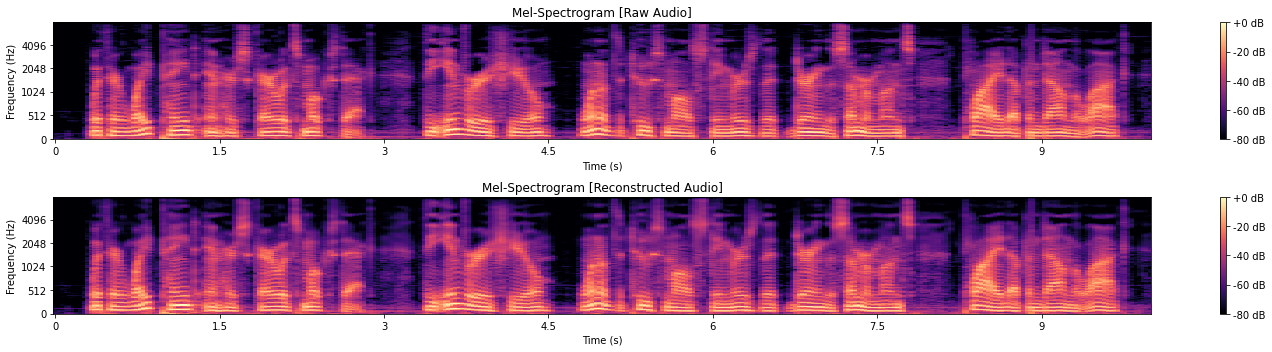

PESQ: 4.1670


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pesq import pesq

y1, y2 = x.squeeze().numpy(), recon_x.squeeze().numpy()

S1 = librosa.feature.melspectrogram(y=y1, sr=sr, n_mels=256)
S2 = librosa.feature.melspectrogram(y=y2, sr=sr, n_mels=256)
S1_dB = librosa.power_to_db(S1, ref=np.max)
S2_dB = librosa.power_to_db(S2, ref=np.max)

plt.figure(figsize=(20, 5))
plt.subplot(2, 1, 1)
librosa.display.specshow(S1_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram [Raw Audio]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.subplot(2, 1, 2)
librosa.display.specshow(S2_dB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram [Reconstructed Audio]')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')

plt.tight_layout()
plt.show()

score = pesq(16000, y1, y2)
print(f"PESQ: {score:.4f}")

In [5]:
import IPython.display as ipd
# raw audio
ipd.display(ipd.Audio(y1, rate=sr))
# recon audio
ipd.display(ipd.Audio(y2, rate=sr))